In [1]:
from datetime import date
from nsepy import get_history
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [2]:
import quandl
quandl.ApiConfig.api_key = 'sGezgBPfwAHugRozqVGS'

In [3]:
tesla = quandl.get('WIKI/TSLA')              # import Tesla stock data from the Web using Quandl's API

In [ ]:
tesla.head()                                 # look at the data

Let's look at the closing stock price for this company's stock over time

In [ ]:
tesla.Close.plot()
plt.xticks(rotation=45)

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse

Let's fit a basic time series model to this data. It assumes the underlying time series can be represented as a combination of periodic fluctuations, a linear trend and random noise. This simple assumption about the generative process tends to help us separate out the underlying trend in the data from periodic fluctuations.

In [ ]:
result_mul = seasonal_decompose(tesla['Close'], model='additive', freq=30)
result_mul.plot()
plt.xticks(rotation=45)
plt.rcParams["figure.figsize"] = (12,12)
plt.show()

Let's try one more thing with this time series data. Let's apply a simple smoothing algorithm to the data and see how well this new model captures the underlying data

In [16]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
data = tesla['Close']
# fit model
model = SimpleExpSmoothing(data.values)
model_fit = model.fit(smoothing_level=0.2)
# make prediction
yhat = model_fit.predict(0, len(data.values)-1)

In [ ]:
model_fit.summary()

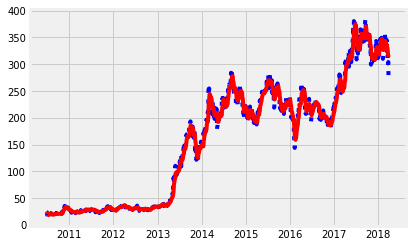

In [24]:
plt.plot(tesla.Close, 'b:')
plt.plot(data.index, yhat, 'r')

Blue dots show the data, red line shows the model fit. How would you make the mode

In [13]:
data.index

DatetimeIndex(['2010-06-29', '2010-06-30', '2010-07-01', '2010-07-02',
               '2010-07-06', '2010-07-07', '2010-07-08', '2010-07-09',
               '2010-07-12', '2010-07-13',
               ...
               '2018-03-14', '2018-03-15', '2018-03-16', '2018-03-19',
               '2018-03-20', '2018-03-21', '2018-03-22', '2018-03-23',
               '2018-03-26', '2018-03-27'],
              dtype='datetime64[ns]', name='Date', length=1949, freq=None)